# ML3

### Theory

1. [Heteroscedasticity in regression](#1)
2. [What is multicollinearity, and how do you treat it?](#2)
3. [What is market basket analysis? ](#3)
4. [What is Association Analysis? Where is it used?](#4)
5. [What is KNN Classifier ?](#5)
6. [What is Pipeline in sklearn ?](#6)
7. [What is Principal Component Analysis(PCA), and why we do?](#7)
8. [What is t-SNE?](#8)
9. [VIF(Variation Inflation Factor),Weight of Evidence & Information
Value. Why and when to use?](#9)
10. [How to evaluate that data does not have any outliers ?](#10)
11. [What you do if there are outliers?](#11)
12. [What are the encoding techniques you have applied with
Examples ?](#12)
13. [What is the difference between Type 1 and Type 2 error and
severity of the error?](#13)
14. [What is binomial distribution and polynomial distribution?](#14)
15. [What is the Mean Median Mode standard deviation for the
sample and population?](#15)
16. [What is Mean Absolute Error ?](#16)
17. [What is the difference between long data and wide data?](#17)
18. [What are the data normalization method you have applied, and
why?](#18)
19. [What is the difference between normalization and
Standardization with example?](#20)

### Practice

We will:
- avoid heteroscedasticity
    - check VIF
- avoid multicollinearity
- pca
- t-sne
- avoid outliers
- market basket analysis
- assocation analysis

<a id='1'></a>

# Heteroscedasticity in regression

Heteroscedasticity means unequal scattered distribution. In regression analysis, we generally talk about the heteroscedasticity in the context of the error term. Heteroscedasticity is the systematic change in the spread of the residuals or errors over the range of measured values. Heteroscedasticity is the problem because Ordinary least squares (OLS) regression assumes that all residuals are drawn from a random
population that has a constant variance.

To satisfy the regression assumptions and be able to trust the results, the residuals should have a constant variance. 

Heteroscedasticity occurs more often in datasets, where we have a large range between the largest and the smallest observed values. There are many reasons why heteroscedasticity can exist, and a generic explanation is that the error variance changes proportionally with a factor.

<a id='2'></a>

# What is multicollinearity, and how to treat it?

Multicollinearity means independent variables are highly correlated to each other. In regression analysis, it's an important assumption that the regression model should not be faced with a problem of multicollinearity. If two explanatory variables are highly correlated, it's hard to tell, which affects the dependent variable. Let's say Y is regressed against X1 and X2 and where X1 and X2 are highly correlated. Then the effect
of X1 on Y is hard to distinguish from the effect of X2 on Y because any increase in X1 tends to be associated with an increase in X2.
Another way to look at the multicollinearity problem is: Individual t-test P values can be misleading. It means a P-value can be high, which means the variable is not important, even though the variable is important.

### Correcting Multicollinearity:
1. Remove one of the highly correlated independent variables from the model. If you have two or more factors with a high VIF, remove one from the model.
2. Principle Component Analysis (PCA) - It cut the number of interdependent variables to a smaller set of uncorrelated components. Instead of using highly correlated variables, use components in the model that have **eigenvalue** greater than 1.
3. Run **PROC VARCLUS** and choose the variable that has a minimum (1-R2) ratio within a cluster.
4. Ridge Regression - It is a technique for analyzing multiple regression data that suffer from multicollinearity.
5. If you include an interaction term (the product of two independent variables), you can also reduce multicollinearity by "centering" the variables. By "centering," it means subtracting the mean from the values of the independent variable before creating the products.


### When is multicollinearity not a problem?
1. If your goal is to predict Y from a set of X variables, then multicollinearity is not a problem. The predictions will still be accurate, and the overall R2 (or adjusted R2) quantifies how well the model predicts the Y values.
2. Multiple dummy (binary) variables that represent a categorical variable with three or more categories.

<a id='3'></a>

# What is market basket analysis? 

Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items. It works by looking for combinations of items that occur together frequently in transactions. To put it another way, it allows retailers to identify relationships between the items that people buy.
Association Rules are widely used to analyze retail basket or transaction data, and are intended to identify strong rules discovered in transaction data using measures of interestingness, based on the concept of strong rules.



<a id='4'></a>

# What is Association Analysis? Where is it used?

Association analysis uses a set of transactions to discover rules that indicate the likely occurrence of an item based on the occurrences of other items in the transaction.
The technique of association rules is widely used for retail basket analysis. It can also be used for classification by using rules with class labels on the right-hand side. It is even used for outlier detection with rules indicating infrequent/abnormal association.
Association analysis also helps us to identify cross-selling opportunities, for example, we can use the rules resulting from the analysis to place associated products together in a catalog, in the supermarket, or the Webshop, or apply them when targeting a marketing campaign for product B at customers who have already purchased product A.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
dataset = pd.read_csv('../data/Market_Basket_Optimisation.csv', header = None)

In [2]:
dataset.head(100)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
records = []  
for i in range(0, dataset.shape[0]):  
    records.append([str(dataset.values[i,j]) for j in range(0, 15)])
association_rules = apriori(records,
                            min_support=0.003,
                            min_confidence=0.20,
                            min_lift=3,
                            min_length=3)
association_results = list(association_rules)
results = []
for item in association_results:
    
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    
    value0 = str(items[0])
    value1 = str(items[1])

    #second index of the inner list
    value2 = str(item[1])[:7]

    #third index of the list located at 0th
    #of the third index of the inner list

    value3 = str(item[2][0][2])[:7]
    value4 = str(item[2][0][3])[:7]
    
    rows = (value0, value1,value2,value3,value4)
    results.append(rows)
    
labels = ['Title 1','Title 2','Support','Confidence','Lift']
movie_suggestion = pd.DataFrame.from_records(results, columns = labels)

print(movie_suggestion)

                  Title 1            Title 2  Support Confidence     Lift
0             light cream            chicken  0.00453    0.29059  4.84395
1    mushroom cream sauce           escalope  0.00573    0.30069  3.79083
2                escalope              pasta  0.00586    0.37288  4.70081
3                   honey      fromage blanc  0.00333    0.24509  5.16427
4           herb & pepper        ground beef  0.01599    0.32345  3.29199
5             ground beef       tomato sauce  0.00533    0.37735  3.84065
6             light cream          olive oil  0.00319    0.20512  3.12102
7               olive oil  whole wheat pasta  0.00799    0.27149  4.13077
8                  shrimp              pasta  0.00506    0.32203  4.50667
9                    milk            avocado  0.00333    0.41666  3.21544
10                   milk               cake  0.00373    0.27999  3.21143
11                 turkey          chocolate  0.00306    0.27058  3.10348
12                 turkey             

<a id='5'></a>

# What is KNN Classifier ?

Is the one of the most simplest algorithms. KNN means K-Nearest Neighbour Algorithm. It can be used for both classification and regression.

It is the simplest machine learning algorithm. Also known as lazy learning (why? Because it does not create a generalized model during the time of training, so the testing phase is very important where it does the actual job. Hence Testing is very costly - in terms of time & money). Also called an instance-based or memory-based learning
In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is assigned to the class of that single nearest neighbor.

In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors

All three distance measures are only valid for continuous variables. In the instance of categorical variables, the Hamming distance must be used.

### How to choose the value of K
: K value is a hyperparameter which needs to choose during the time of
model building
Also, a small number of neighbors are most flexible fit, which will have a low bias, but the high variance
and a large number of neighbors will have a smoother decision boundary, which means lower variance
but higher bias.
We should choose an odd number if the number of classes is even. It is said the most common values are
to be 3 & 5.

We usually can use KNN for feature engineering, recommender systems, imputing missing data etc

<a id='6'></a>

# What is Pipeline in sklearn ?

A pipeline is what chains several steps together, once the initial exploration is done. For example, some codes are meant to transform features — normalize numerically, or turn text into vectors, or fill up missing data, and they are transformers; other codes are meant to predict variables by fitting an algorithm,such as random forest or support vector machine, they are estimators. Pipeline chains all these together, which can then be applied to training data in block. 

Example of a pipeline that imputes data with the most frequent value of each column, and then fit a decision tree classifier

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
steps = [('imputation',
          Imputer(missing_values='NaN',
                  strategy = 'most_frequent',
                  axis=0)),
         ('clf', DecisionTreeClassifier())]
pipeline = Pipeline(steps)

#clf = pipeline.fit(X_train,y_train)
# Instead of fitting to one model, it can be looped over several models to find the best one.
classifiers = [ KNeighborsClassifier(5),
               RandomForestClassifier(),
               GradientBoostingClassifier()]
for clf in classifiers:
    steps = [('imputation',
              Imputer(missing_values='NaN',
                      strategy = 'most_frequent', axis=0)),
('clf', clf)]
pipeline = Pipeline(steps)

# pipeline itself can be used as an estimator and passed to cross-validation or grid search.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, random_state=2)
#results = cross_val_score(pipeline, X_train, y_train, cv=kfold)
#print(results.mean())

/home/predator/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/predator/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/predator/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/predator/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: Depre

<a id='7'></a>

# What is Principal Component Analysis(PCA), and why we do?

The main idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of many variables correlated with each other, either heavily or lightly, while retaining the variation present in the dataset, up to the maximum extent. The same is done by transforming the variables to a new set of variables, which are known as the principal components (or simply, the PCs) and are orthogonal, ordered such that the retention of variation present in the original variables decreases as we move down in the order. So, in this way, the 1st principal component retains maximum variation
that was present in the original components. 

Main important points to be considered:
1. Normalize the data
2. Calculate the covariance matrix
3. Calculate the eigenvalues and eigenvectors
4. Choosing components and forming a feature vector
5. Forming Principal Components

<a id='8'></a>

# What is t-SNE?
(t-SNE) t-Distributed Stochastic Neighbor Embedding is a non-linear dimensionality reduction algorithm used for exploring high-dimensional data. It maps multi-dimensional data to two or more dimensions suitable for human observation. With the help of the t-SNE algorithms, you may have to plot fewer exploratory data analysis plots next time you work with high dimensional data.

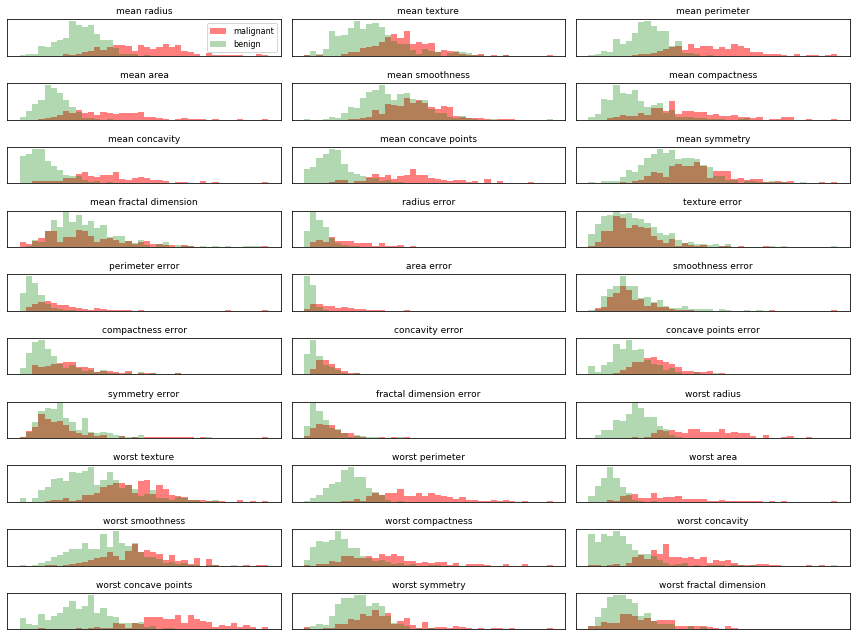

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

import numpy as np
import matplotlib.pyplot as plt 
fig,axes =plt.subplots(10,3, figsize=(12, 9)) # 3 columns each containing 10 figures, total 30 features
malignant=cancer.data[cancer.target==0] # define malignant
benign=cancer.data[cancer.target==1] # define benign
ax=axes.ravel()# flat axes with numpy ravel
for i in range(30):
  _,bins=np.histogram(cancer.data[:,i],bins=40)
  ax[i].hist(malignant[:,i],bins=bins,color='r',alpha=.5)# red color for malignant class
  ax[i].hist(benign[:,i],bins=bins,color='g',alpha=0.3)# alpha is           for transparency in the overlapped region 
  ax[i].set_title(cancer.feature_names[i],fontsize=9)
  ax[i].axes.get_xaxis().set_visible(False) # the x-axis co-ordinates are not so useful, as we just want to look how well separated the histograms are
  ax[i].set_yticks(())
ax[0].legend(['malignant','benign'],loc='best',fontsize=8)
plt.tight_layout()# let's make good plots
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(cancer.data) 
X_scaled=scaler.transform(cancer.data)
print("after scaling minimum", X_scaled.min(axis=0))

after scaling minimum [-2.0296483  -2.22924851 -1.98450403 -1.45444309 -3.11208479 -1.61013634
 -1.11487284 -1.26181958 -2.74411707 -1.81986478 -1.05992413 -1.55426392
 -1.04404888 -0.73782907 -1.77606498 -1.2980982  -1.05750068 -1.91344745
 -1.53289003 -1.09696818 -1.72690052 -2.22399401 -1.69336103 -1.22242284
 -2.68269492 -1.4438784  -1.30583065 -1.74506282 -2.16095969 -1.60183949]


In [18]:
pd.DataFrame(cancer.target)[0].value_counts()

1    357
0    212
Name: 0, dtype: int64

1 is 3000, 0 is 200, then we should increase proportion of 0

In [24]:
oo = pd.DataFrame(cancer.data)

In [26]:
oo['target'] = cancer.target

In [29]:
oo_zeros = oo[oo.target==0]

In [32]:
some_samples = oo_zeros.sample(100)

In [38]:
oo.append(some_samples)['target'].value_counts()

1    357
0    312
Name: target, dtype: int64

In [113]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3) 
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled) 
print("shape of X_pca", X_pca.shape)

shape of X_pca (569, 3)


In [114]:
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.60950217 0.2611802  0.12931763]


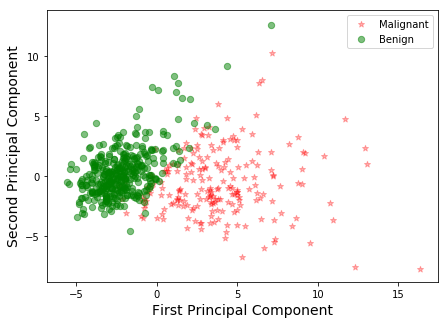

In [115]:
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=cancer.target
cdict={0:'red',1:'green'}
labl={0:'Malignant',1:'Benign'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
 ix=np.where(labels==l)
 ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,
           label=labl[l],marker=marker[l],alpha=alpha[l])
# for loop ends
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

you should look at your plot, sometimes PCA work bad, thus you should use PPA, but first let me introduce you where PPA has trouble:
* PPA does not work well when the class sizes are no equal.
* PPA also struggles when the number of classes is not a power of 2 due to the geometry of the separation. 
* PPA also struggles with over fitting and data compression usually needs to be performed (roughly 10:1 sample to variable ratio is needed). If not, the algorithm will artificially push samples into corners. 

In [116]:
np.arange(10).reshape(10, 1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [117]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [118]:
from skpp import ProjectionPursuitRegressor 
estimator = ProjectionPursuitRegressor(degree=3) 
estimator.fit(X_scaled, cancer.target)

ProjectionPursuitRegressor(backfit_maxiter=10, degree=3, eps_backfit=0.01,
              eps_stage=0.0001, example_weights='uniform',
              fit_type='polyfit', opt_level='high',
              out_dim_weights='inverse-variance', plot_epoch=50, r=10,
              random_state=None, show_plots=False, stage_maxiter=100)

In [119]:
X_ppa=estimator.transform(X_scaled) 

In [120]:
X_ppa

array([[ 0.14160553,  0.05534096, -0.0462537 , ...,  0.00326364,
         0.08781056, -0.09096657],
       [ 0.12380965, -0.10232421,  0.00245382, ..., -0.12246084,
        -0.0137024 , -0.12855215],
       [ 0.1872611 ,  0.00800732, -0.00113532, ..., -0.00413496,
        -0.0245029 ,  0.11543304],
       ...,
       [ 0.04799063,  0.01193769, -0.01070423, ..., -0.0660664 ,
        -0.02658897,  0.01692135],
       [ 0.29253164,  0.13091905, -0.05189139, ...,  0.11958577,
        -0.00387288, -0.03944746],
       [-0.12399069, -0.02282058, -0.03675473, ...,  0.16225564,
        -0.07403896,  0.07842758]])

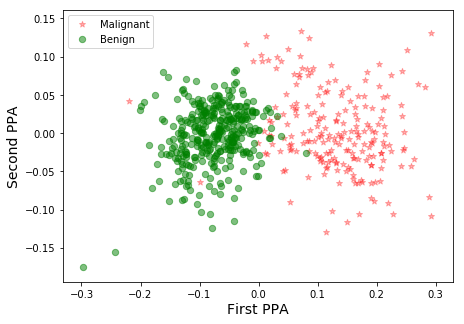

In [121]:
Xax=X_ppa[:,0]
Yax=X_ppa[:,1]
labels=cancer.target
cdict={0:'red',1:'green'}
labl={0:'Malignant',1:'Benign'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
 ix=np.where(labels==l)
 ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,
           label=labl[l],marker=marker[l],alpha=alpha[l])
# for loop ends
plt.xlabel("First PPA",fontsize=14)
plt.ylabel("Second PPA",fontsize=14)
plt.legend()
plt.show()

In [122]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [123]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

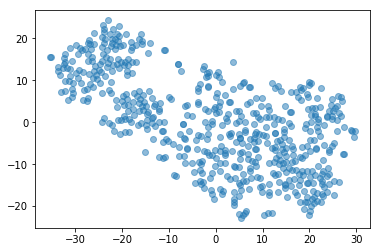

In [124]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5);

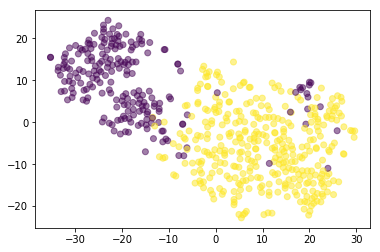

In [125]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=cancer.target, alpha=.5);

<a id='9'></a>

# VIF(Variance Inflation Factor),Weight of Evidence & Information Value. Why and when to use?

Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity. Variance inflation factors (VIF) measure how much the variance of the estimated regression coefficients are inflated as compared to when the predictor variables are not linearly related.
It is obtained by regressing each independent variable, say X on the remaining independent variables (say Y and Z) and checking how much of it (of X) is explained by these variables.


### VIF = 1/(1-R^2)
Hence,
From the formula, it is clear that higher the VIF, higher the R2 which means the variable X is collinear with Y and Z variables. If all the variables are completely orthogonal, R2 will be 0 resulting in VIF of 1.

#### Input & Output:
To run “Variance Inflation Factor” , select the dependent variable and the independent variables. All the variables should be numeric. Then specify the dependent variable.
The function will result in a table with VIF values of all independent variables selected.
#### Application & Interpretation:
From the list of variables, we select the variables with high VIF as collinear variables. But to decide which variable to select, we look at the Condition Index of the variables or the final regression coefficient table.
As a thumb rule, any variable with VIF > 1.5 is avoided in a regression analysis. Sometimes the condition is relaxed to 2, instead of 1.5.

<a id='10'></a>

# How to evaluate that data does not have any outliers ?
We have 3 commont method to evaluate that data has outliers

* Standart Deviation - In statistics, If a data distribution is approximately normal, then about 68% of the data values lie within one standard deviation of the mean, and about 95% are within two standard deviations, and about 99.7% lie within three standard deviations. Therefore, if you have any data point that is more than 3 times the standard deviation, then those points are very likely to be anomalous or outliers.

![](../pics/29.png)

* Boxplots - Box plots are a graphical view of numerical data through their quantiles. It is a very simple but effective way to visualize outliers. Think about the lower and upper whiskers as the boundaries of the data distribution. Any data points that show above or below the whiskers can be considered outliers or anomalous.

![](../pics/30.png)

* Violin plots -Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator. Typically a violin plot will include all the data that is in a box plot: a marker for the median of the data, a box or marker indicating the interquartile range, and possibly all sample points if the number of samples is not too high

![](../pics/31.png)

* Scatter plots - A scatter plot is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points which are very far away from the general spread of data and have a very few neighbors are considered to be outliers

![](../pics/32.png)


<a id='11'></a>

# What you do if there are outliers?

1. Drop the outlier records
2. Assign a new value: If an outlier seems to be due to a mistake in your data, you try imputing a value.
3. If percentage-wise the number of outliers is less, but when we see numbers, there are several, then, in that case, dropping them might cause a loss in insight. We should group them in that case and run our analysis separately on them.


<a id='12'></a>

# What are the encoding techniques  ?

* Label encoding: In label encoding, we map each category to a number or a label. The labels chosen for
the categories have no relationship. So categories that have some ties or are close to each other lose such
information after encoding.
* One - hot encoding: In this method, we map each category to a vector that contains 1 and 0 denoting
the presence of the feature or not. The number of vectors depends on the categories which we want to
keep. For high cardinality features, this method produces a lot of columns that slows down the learning
significantly.

<a id='13'></a>

# What is the difference between Type 1 and Type 2 error and severity of the error?

#### Type I Error
A Type I error is often referred to as a “false positive" and is the incorrect rejection of the true null
hypothesis in favor of the alternative. 
#### Type II Error
A Type II error is the inverse of a Type I error and is the false acceptance of a null hypothesis that is not
true, i.e., a false negative.

But in most fields of science, Type II errors are seen as less serious than Type I errors. With the Type II
error, a chance to reject the null hypothesis was lost, and no conclusion is inferred from a non-rejected
null. But the Type I error is more serious because you have wrongly rejected the null hypothesis and
ultimately made a claim that is not true. In science, finding a phenomenon where there is none is more
egregious than failing to find a phenomenon where there is.

<a id='14'></a>

# What is binomial distribution and polynomial distribution?

* **Binomial Distribution**: A binomial distribution can be thought of as simply the probability of a
SUCCESS or FAILURE outcome in an experiment or survey that is repeated multiple times. The
binomial is a type of distribution that has two possible outcomes (the prefix “bi” means two, or twice).
For example, a coin toss has only two possible outcomes: heads or tails, and taking a test could have two
possible outcomes: pass or fail.
* **Multimonial/Polynomial Distribution**: Multi or Poly means many. In probability theory, the
multinomial distribution is a generalization of the binomial distribution. For example, it models the
probability of counts of each side for rolling a k-sided die n times. For n independent trials each of which
leads to success for exactly one of k categories, with each category having a given fixed success
probability, the multinomial distribution gives the probability of any particular combination of numbers
of successes for the various categories

<a id='15'></a>

# What is the Mean Median Mode standard deviation for the sample and population?

* Mean It is an important technique in statistics. Arithmetic Mean can also be called an average. It is the
number of the quantity obtained by summing two or more numbers/variables and then dividing the sum
by the number of numbers/variables.
* Mode The mode is also one of the types for finding the average. A mode is a number that occurs most
frequently in a group of numbers. Some series might not have any mode; some might have two modes,
which is called a bimodal series.
In the study of statistics, the three most common ‘averages’ in statistics are mean, median, and mode.
* Median is also a way of finding the average of a group of data points. It’s the middle number of a set of
numbers. There are two possibilities, the data points can be an odd number group, or it can be an even
number group.
If the group is odd, arrange the numbers in the group from smallest to largest. The median will be the
one which is exactly sitting in the middle, with an equal number on either side of it. If the group is even,
arrange the numbers in order and pick the two middle numbers and add them then divide by 2. It will be
the median number of that set.
* Standard Deviation (Sigma) Standard Deviation is a measure of how much your data is spread out in
statistics.

<a id='17'></a>

# What is the difference between long data and wide data?

There are many different ways that you can present the same dataset to the world. Let's take a look at
one of the most important and fundamental distinctions, whether a dataset is wide or long.
The difference between wide and long datasets boils down to whether we prefer to have more columns
in our dataset or more rows.

* **Wide Data** A dataset that emphasizes putting additional data about a single subject in columns is called
a wide dataset because, as we add more columns, the dataset becomes wider.

* **Long Data** Similarly, a dataset that emphasizes including additional data about a subject in rows is called
a long dataset because, as we add more rows, the dataset becomes longer. It's important to point out that
there's nothing inherently good or bad about wide or long data.
In the world of data wrangling, we sometimes need to make a long dataset wider, and we sometimes need
to make a wide dataset longer. However, it is true that, as a general rule, data scientists who embrace the
concept of tidy data usually prefer longer datasets over wider ones.

<a id='18'></a>

# What are the data normalization method you have applied, and why?

Normalization is a technique often applied as part of data preparation for machine learning. The goal of
normalization is to change the values of numeric columns in the dataset to a common scale, without
distorting differences in the ranges of values. For machine learning, every dataset does not require
normalization. It is required only when features have different ranges.
In simple words, when multiple attributes are there, but attributes have values on different scales, this
may lead to poor data models while performing data mining operations. So they are normalized to bring
all the attributes on the same scale, usually something between (0,1).
It is not always a good idea to normalize the data since we might lose information about maximum and
minimum values. Sometimes it is a good idea to do so.

**For example**, ML algorithms such as Linear Regression or Support Vector Machines typically converge
faster on normalized data. But on algorithms like K-means or K Nearest Neighbours, normalization could not be a good choice or a bad depending on the use case since the distance between the points plays a key
role here.


<a id='19'></a>

# What is the difference between normalization and Standardization with example?

In ML, every practitioner knows that feature scaling is an important issue. The two most discussed
scaling methods are Normalization and Standardization. Normalization typically means it rescales the
values into a range of [0,1].
It is an alternative approach to Z-score normalization (or standardization) is the so-called Min-Max
scaling (often also called “normalization” - a common cause for ambiguities). In this approach, the data
is scaled to a fixed range - usually 0 to 1. Scikit-Learn provides a transformer called MinMaxScaler for
this. A Min-Max scaling is typically done via the following equation:
Xnorm = X-Xmin/Xmax-Xmin


In [127]:
 ! jupyter nbconvert --to html Ml3.ipynb

[NbConvertApp] Converting notebook Ml3.ipynb to html
[NbConvertApp] Writing 613689 bytes to Ml3.html


1. [imputing missing data with KNN](https://towardsdatascience.com/the-use-of-knn-for-missing-values-cf33d935c637)